In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [6]:
raw_path = '../data/Supermart Retail Analytics Dataset.csv'
df_raw = pd.read_csv(raw_path)
print(f"Raw data shape: {df_raw.shape}")
df_raw.head()

Raw data shape: (9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
df_raw['Order Date'] = pd.to_datetime( df_raw['Order Date'],
    errors='coerce',               
    infer_datetime_format=True
)
print("After parsing, null dates:", df_raw['Order Date'].isna().sum())
df_raw[['Order Date']].head()

After parsing, null dates: 5952


C:\Users\katta\AppData\Local\Temp\ipykernel_27516\2220843476.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_raw['Order Date'] = pd.to_datetime( df_raw['Order Date'],


,Order Date
0,2017-11-08
1,2017-11-08
2,2017-06-12
3,2016-10-11
4,2016-10-11


In [8]:
df_clean = df_raw.dropna().reset_index(drop=True)
print(f"Cleaned data shape: {df_clean.shape}")
df_clean.head()

Cleaned data shape: (4042, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu


In [9]:
clean_path = '../data/cleaned_Retail_data.csv'
df_clean.to_csv(clean_path, index=False)
print(f"Saved cleaned data to {clean_path}")

Saved cleaned data to ../data/cleaned_Retail_data.csv


C:\Users\katta\AppData\Local\Temp\ipykernel_27516\312063563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


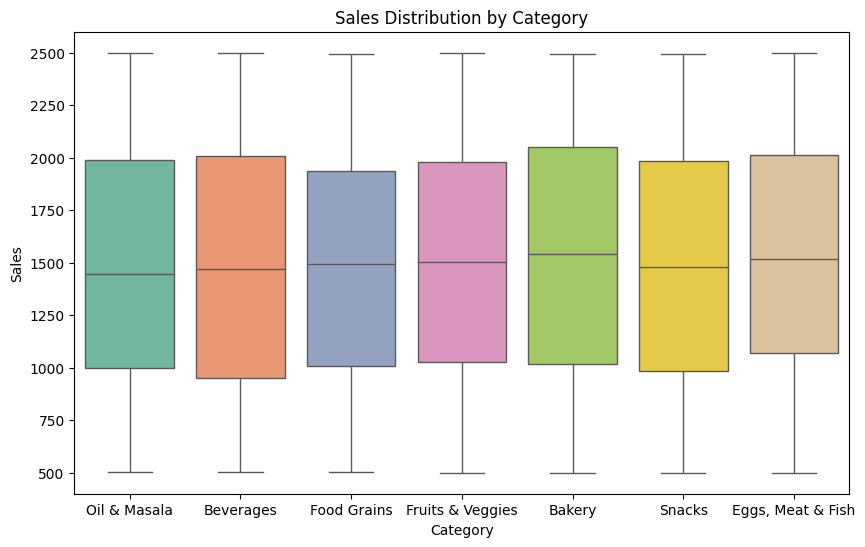

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
cf_data = '../data/cleaned_Retail_data.csv'
data = pd.read_csv(cf_data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

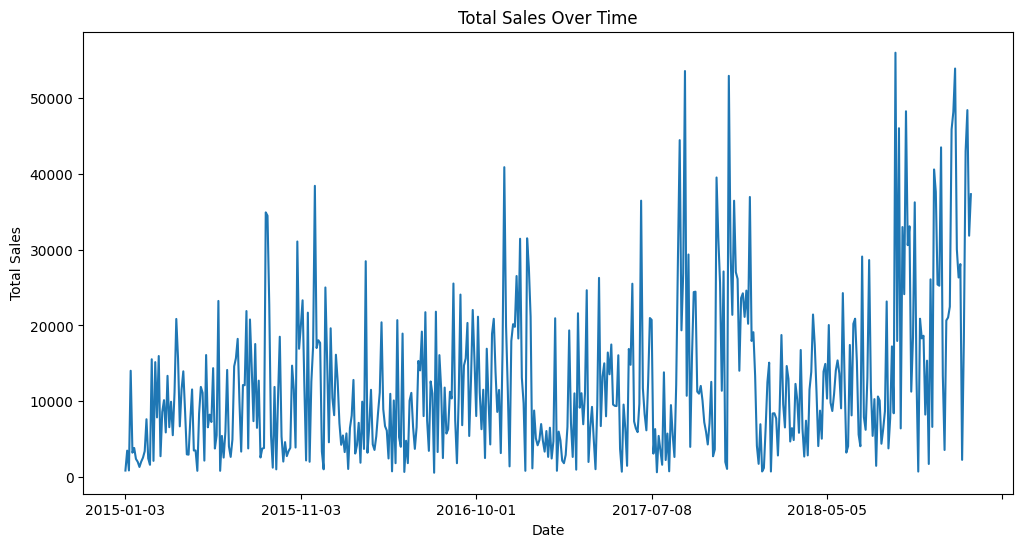

In [11]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()